In [3]:
# MNIST data

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
_, width, height = x_train.shape

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

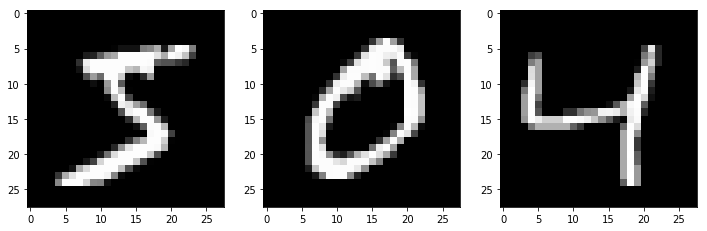

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(x_train[0,], cmap='gray')
plt.subplot(132)
plt.imshow(x_train[1,], cmap='gray')
plt.subplot(133)
plt.imshow(x_train[2,], cmap='gray')

In [4]:
# 데이터 전처리

In [5]:
x_train.astype('float32')
input_train = x_train / 255.0

x_test.astype('float32')
input_test = x_test / 255.0

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import Adam

In [18]:
# setup Model

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(width, height,)))     # 28*28 -> 784
model.add(Dense(196, activation='relu'))             # 196 -> 49 : encode
model.add(Dense(49, activation='relu'))              # compress
model.add(Dense(196, activation='relu'))             # 49 -> 196 : decode
model.add(Dense(width*height, activation='sigmoid')) # 784 -> 28*28
model.add(Reshape((width, height)))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_2 (Dense)              (None, 49)                9653      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               9800      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               154448    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 327,761.0
Trainable params: 327,761.0
Non-trainable params: 0.0
________________________________________________________________

In [9]:
model.compile(loss='mse',
              optimizer=Adam(),
              metrics=['mse'])

In [10]:
batch_size = 128
epochs = 7

In [13]:
# input_train --> input_train (복원)
history = model.fit(input_train, input_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, input_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 13s - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 2/7
60000/60000 [==============================] - 15s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 3/7
60000/60000 [==============================] - 15s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/7
60000/60000 [==============================] - 16s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 5/7
60000/60000 [==============================] - 13s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 6/7
60000/60000 [==============================] - 16s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7/

In [14]:
# 테스트 데이터 regen
input_regen = model.predict(input_test)

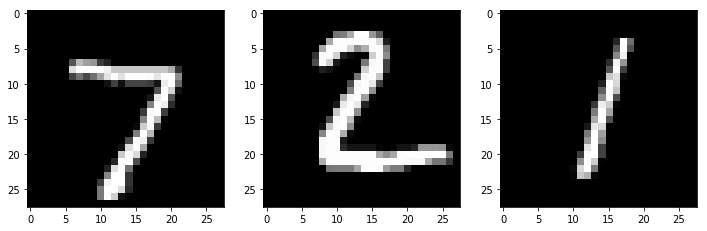

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(input_test[0,], cmap='gray')
plt.subplot(132)
plt.imshow(input_test[1,], cmap='gray')
plt.subplot(133)
plt.imshow(input_test[2,], cmap='gray')

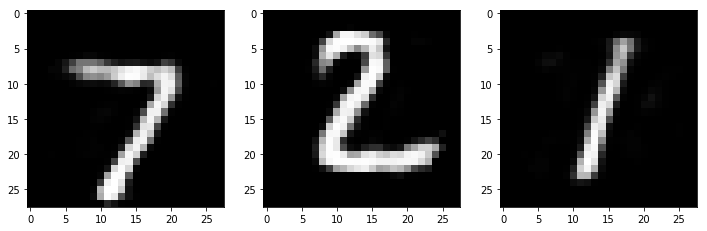

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(input_regen[0,], cmap='gray')
plt.subplot(132)
plt.imshow(input_regen[1,], cmap='gray')
plt.subplot(133)
plt.imshow(input_regen[2,], cmap='gray')

In [20]:
# 노이즈 제거

In [21]:
import numpy

In [23]:
noise = input_test + numpy.random.normal(scale=0.2, size=(width, height))
noise = numpy.clip(noise, 0, 1)

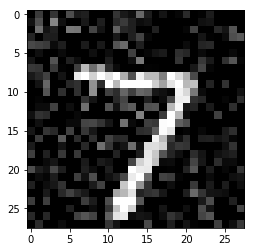

In [25]:
plt.imshow(noise[0,], cmap='gray')

In [26]:
denoise = model.predict(noise)

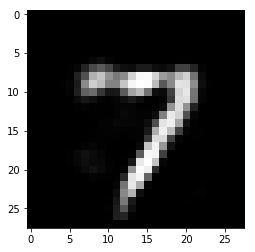

In [27]:
plt.imshow(denoise[0, ], cmap='gray')

In [29]:
# 49개로 차원을 줄인 정보는 모든 차원에서 의미있는 정보이기 때문에 여기에 노이즈를 넣으면 새로운 패턴을 만들 수 있다.

## 모델 저장 / 호출

In [30]:
model.save('keras_autoencoder.sav')

In [31]:
# reload model

In [32]:
from keras.models import load_model

In [33]:
model = load_model('keras_autoencoder.sav')